In [1]:
import pandas as pd

df = pd.read_csv('./data/IMDB Dataset.csv')

In [2]:
df.shape

(40436, 2)

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# For teaching compute time
df = df.sample(5000)

In [5]:
df.shape

(5000, 2)

In [7]:
pd.set_option('display.max_colwidth', None)
df.head(35)

,review,sentiment
29670,"For the most part, romance films were never my cup of tea. But Valley Girl is one of the few romance films I not only could sit through, but actually enjoy. Nicholas Cage is great in his first role and Deborah Foreman is cute beyond belief. There are some side stories that tend to become muddled, but not enough to diminish this film.",positive
26972,"(This review will have some very obvious spoilers, so beware.)<br /><br />A friend brought this over, and we made it through 45 minutes of the movie before we decided that Fast Forward 8x Speed was the only way that this film should be watched. There were points when we were watching the movie at normal speed where I would leave, prepare part of lunch, and return, to find that literally nothing had happened. 2 lines of meaningless dialogue were exchanged. Nothing happened the background, no important facial gestures were made, nothing but mind-numbing awkward silence.<br /><br />This is NOT how to make a thoughtful film, especially when the movie's plot follows all the same basic Hollywood movie tropes. If I told you that Disney was making a film about 4 girls starting a band, and the singer was a French exchange student, what you would expect to be the ""conflicts"" that arise?<br /><br />The lead singer has to overcome stage fright? Someone has an unspoken crush? The band is late for their performance, and a side-character has to buy them time?<br /><br />*SPOILER ALERT*<br /><br />All of those things happen in this movie.<br /><br />At no point in this film do you have even the slightest fraction of concern that these girls won't be able to accomplish their goal.<br /><br />*THIS ENDS THE SECTION OF SPOILERS*<br /><br />I like Japanese films. I've spent a lot of time in Japan. I work for a Japanese company. Heck, I even know all the bands referenced in the record collections and MDs that they're going through, and I've sung along to the title track with friends at karaoke.<br /><br />This is probably the worst film from Japan I've ever seen. Do not be confused. Though the characters will have points in the movie where they do typical Japanese high school things, this is not a ""typical day in the life of"" movie. This is ""a day in the life of 4 extremely random, heavily-conflicted, awkward Japanese students.""<br /><br />There are noticeable problems with the DVD, as well. Viz decided that a great extra would be a producer reading aloud the Wikipedia entry about the Blue Hearts. What a value! In addition, they care so little about the subtitling that the band's name in the subtitles, ""Paran Maum"" is different than it is in the chapter selection menu, ""Paran Marum"". In the final auditorium scene, there is a VERY visible reflection/ghosting effect on everything, but this seems to be the fault of the original film.<br /><br />2/10, do NOT view if you do not absolutely love awkward silences.",negative
37632,"I only went to see this movie because I have always liked Kevin Costner. I felt that Ashton did a great job in the Butterfly Effect. Unfortunately, even though these two actors were/are capable of good if not great acting moments some of that was missing here. Some of the scenes were just not believable and didn't have enough story line support.<br /><br />Though the movie claims influence from the hurricane Katrina aftermath, there was very little (none) to that effect in the movie.<br /><br />Overall, I liked the fact that the movie brought forward some of what goes into saving lives from a water perspective.<br /><br />The special effects were pretty good and more than a little intimidating. Not sure I'll ever go deep sea fishing again...<br /><br />I expected a little more emotion in the film than what was presented.<br /><br />Definitely a movie that could've been seen on DVD.",positive
7917,"I know we shouldn't expect much from a low-budget indie film. But the idea behind it is sound: an attempt to open America's eyes to the cozy relationship

In [8]:
df['review'] = df['review'].apply(lambda x: x.replace("<br />", ""))

In [9]:
df.head(35)

,review,sentiment
29670,"For the most part, romance films were never my cup of tea. But Valley Girl is one of the few romance films I not only could sit through, but actually enjoy. Nicholas Cage is great in his first role and Deborah Foreman is cute beyond belief. There are some side stories that tend to become muddled, but not enough to diminish this film.",positive
26972,"(This review will have some very obvious spoilers, so beware.)A friend brought this over, and we made it through 45 minutes of the movie before we decided that Fast Forward 8x Speed was the only way that this film should be watched. There were points when we were watching the movie at normal speed where I would leave, prepare part of lunch, and return, to find that literally nothing had happened. 2 lines of meaningless dialogue were exchanged. Nothing happened the background, no important facial gestures were made, nothing but mind-numbing awkward silence.This is NOT how to make a thoughtful film, especially when the movie's plot follows all the same basic Hollywood movie tropes. If I told you that Disney was making a film about 4 girls starting a band, and the singer was a French exchange student, what you would expect to be the ""conflicts"" that arise?The lead singer has to overcome stage fright? Someone has an unspoken crush? The band is late for their performance, and a side-character has to buy them time?*SPOILER ALERT*All of those things happen in this movie.At no point in this film do you have even the slightest fraction of concern that these girls won't be able to accomplish their goal.*THIS ENDS THE SECTION OF SPOILERS*I like Japanese films. I've spent a lot of time in Japan. I work for a Japanese company. Heck, I even know all the bands referenced in the record collections and MDs that they're going through, and I've sung along to the title track with friends at karaoke.This is probably the worst film from Japan I've ever seen. Do not be confused. Though the characters will have points in the movie where they do typical Japanese high school things, this is not a ""typical day in the life of"" movie. This is ""a day in the life of 4 extremely random, heavily-conflicted, awkward Japanese students.""There are noticeable problems with the DVD, as well. Viz decided that a great extra would be a producer reading aloud the Wikipedia entry about the Blue Hearts. What a value! In addition, they care so little about the subtitling that the band's name in the subtitles, ""Paran Maum"" is different than it is in the chapter selection menu, ""Paran Marum"". In the final auditorium scene, there is a VERY visible reflection/ghosting effect on everything, but this seems to be the fault of the original film.2/10, do NOT view if you do not absolutely love awkward silences.",negative
37632,"I only went to see this movie because I have always liked Kevin Costner. I felt that Ashton did a great job in the Butterfly Effect. Unfortunately, even though these two actors were/are capable of good if not great acting moments some of that was missing here. Some of the scenes were just not believable and didn't have enough story line support.Though the movie claims influence from the hurricane Katrina aftermath, there was very little (none) to that effect in the movie.Overall, I liked the fact that the movie brought forward some of what goes into saving lives from a water perspective.The special effects were pretty good and more than a little intimidating. Not sure I'll ever go deep sea fishing again...I expected a little more emotion in the film than what was presented.Definitely a movie that could've been seen on DVD.",positive
7917,"I know we shouldn't expect much from a low-budget indie film. But the idea behind it is sound: an attempt to open America's eyes to the cozy relationship between the government, and the journalists that are supposed to be keeping an eye out against it. But somehow the documentary aspect of it, takes away from its drama. The protests during the

## Tokenization

In [10]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [11]:
# Using lemmas as our tokens

tokens = []

for doc in nlp.pipe(df['review']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != "PRON") and (token.is_punct != True)):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

In [12]:
len(tokens) == df.shape[0]

True

In [13]:
tokens[0]

['romance',
 'film',
 'cup',
 'tea',
 'Valley',
 'Girl',
 'romance',
 'film',
 'sit',
 'actually',
 'enjoy',
 'Nicholas',
 'Cage',
 'great',
 'role',
 'Deborah',
 'Foreman',
 'cute',
 'belief',
 'story',
 'tend',
 'muddled',
 'diminish',
 'film']

## Gensim LDA Topic Modeling

In [14]:
import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [15]:
id2word = corpora.Dictionary(tokens) # A list of tokens

In [16]:
len(id2word.keys())

40571

In [17]:
id2word.filter_extremes(no_below=5, no_above=.95)

In [18]:
len(id2word.keys())

9482

In [19]:
corpora = [id2word.doc2bow(doc) for doc in tokens]

In [20]:
corpora[5]

[(11, 6),
 (17, 1),
 (50, 1),
 (55, 1),
 (74, 2),
 (75, 1),
 (85, 1),
 (90, 1),
 (108, 1),
 (134, 1),
 (147, 1),
 (192, 1),
 (202, 1),
 (215, 2),
 (235, 2),
 (245, 1),
 (255, 2),
 (256, 2),
 (257, 1),
 (258, 3),
 (259, 1),
 (260, 1),
 (261, 1),
 (262, 1),
 (263, 1),
 (264, 1),
 (265, 1),
 (266, 1),
 (267, 1),
 (268, 1),
 (269, 1),
 (270, 1),
 (271, 2),
 (272, 1),
 (273, 1),
 (274, 2),
 (275, 1),
 (276, 1),
 (277, 1),
 (278, 1),
 (279, 2),
 (280, 1),
 (281, 2),
 (282, 1),
 (283, 1),
 (284, 1),
 (285, 1),
 (286, 1),
 (287, 1),
 (288, 1),
 (289, 1),
 (290, 1),
 (291, 1),
 (292, 1),
 (293, 1),
 (294, 1),
 (295, 1),
 (296, 1),
 (297, 1),
 (298, 1),
 (299, 1),
 (300, 1),
 (301, 1),
 (302, 2),
 (303, 1),
 (304, 1),
 (305, 1),
 (306, 1),
 (307, 1),
 (308, 1),
 (309, 1),
 (310, 2),
 (311, 1),
 (312, 1),
 (313, 1),
 (314, 1)]

In [21]:
lda = LdaMulticore(corpus=corpora,
                  id2word=id2word,
                  num_topics=15,
                  passes=50)

In [22]:
lda.print_topics()

[(0,
  '0.023*"film" + 0.009*"movie" + 0.007*"family" + 0.006*"life" + 0.005*"time" + 0.005*"play" + 0.004*"story" + 0.004*"see" + 0.004*"character" + 0.004*"scene"'),
 (1,
  '0.010*"film" + 0.008*"scene" + 0.008*"like" + 0.007*"look" + 0.006*"people" + 0.005*"movie" + 0.005*"time" + 0.004*"character" + 0.004*"thing" + 0.004*"version"'),
 (2,
  '0.051*"movie" + 0.022*"bad" + 0.015*"like" + 0.015*"watch" + 0.013*"good" + 0.012*"film" + 0.010*"think" + 0.008*"time" + 0.008*"scene" + 0.008*"see"'),
 (3,
  '0.016*"film" + 0.012*"good" + 0.010*"action" + 0.007*"movie" + 0.006*"book" + 0.006*"great" + 0.006*"time" + 0.005*"play" + 0.005*"story" + 0.004*"like"'),
 (4,
  '0.009*"like" + 0.008*"film" + 0.006*"get" + 0.005*"good" + 0.005*"play" + 0.005*"kill" + 0.005*"look" + 0.005*"try" + 0.005*"man" + 0.005*"find"'),
 (5,
  '0.011*"Stewart" + 0.011*"Anna" + 0.010*"Steve" + 0.007*"good" + 0.007*"Davis" + 0.006*"like" + 0.005*"film" + 0.005*"Bette" + 0.005*"performance" + 0.005*"Mencia"'),
 (6,


In [23]:
import re
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]

In [26]:
words

[['film',
  'movie',
  'family',
  'life',
  'time',
  'play',
  'story',
  'see',
  'character',
  'scene'],
 ['film',
  'scene',
  'like',
  'look',
  'people',
  'movie',
  'time',
  'character',
  'thing',
  'version'],
 ['movie',
  'bad',
  'like',
  'watch',
  'good',
  'film',
  'think',
  'time',
  'scene',
  'see'],
 ['film',
  'good',
  'action',
  'movie',
  'book',
  'great',
  'time',
  'play',
  'story',
  'like'],
 ['like', 'film', 'get', 'good', 'play', 'kill', 'look', 'try', 'man', 'find'],
 ['Stewart',
  'Anna',
  'Steve',
  'good',
  'Davis',
  'like',
  'film',
  'Bette',
  'performance',
  'Mencia'],
 ['movie',
  'like',
  'good',
  'character',
  'think',
  'story',
  'love',
  'watch',
  'great',
  'see'],
 ['film',
  'episode',
  'series',
  'story',
  'like',
  'time',
  'character',
  'good',
  'love',
  'year'],
 ['film',
  'Jeff',
  'good',
  'character',
  'like',
  'great',
  'guy',
  'play',
  'Karloff',
  'look'],
 ['film',
  'character',
  'story',
  'l

In [24]:
topics = [' '.join(t[0:5]) for t in words]

In [27]:
for id, t in enumerate(topics):
    print(f"----- Topic {id} -----")
    print(t, end="\n\n")

----- Topic 0 -----
film movie family life time

----- Topic 1 -----
film scene like look people

----- Topic 2 -----
movie bad like watch good

----- Topic 3 -----
film good action movie book

----- Topic 4 -----
like film get good play

----- Topic 5 -----
Stewart Anna Steve good Davis

----- Topic 6 -----
movie like good character think

----- Topic 7 -----
film episode series story like

----- Topic 8 -----
film Jeff good character like

----- Topic 9 -----
film character story life man

----- Topic 10 -----
film man know see time

----- Topic 11 -----
game Victoria film new great

----- Topic 12 -----
season film come movie like

----- Topic 13 -----
bad know go film movie

----- Topic 14 -----
film movie good like time



## Interpret LDA Results

In [28]:
# Part 1: Topic Distance Visualization
"""
Tells us if the topics are distinct, and what terms are most import important to the topic distribution.
"""

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [29]:
pyLDAvis.gensim.prepare(lda, corpora, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.161992 -0.031829       1        1  17.709927
9     -0.014291  0.047264       2        1  17.538286
6      0.090083  0.001420       3        1  12.485049
14     0.088353 -0.018931       4        1  11.212042
4     -0.004422 -0.016521       5        1   7.859917
7     -0.001592  0.018603       6        1   7.453363
0     -0.007617  0.032823       7        1   6.423607
10    -0.018823  0.034986       8        1   5.279297
1      0.052182 -0.009796       9        1   4.284075
13     0.073133 -0.022813      10        1   2.619353
3      0.002455 -0.012914      11        1   2.180721
8     -0.075060  0.019975      12        1   1.549141
11    -0.082517  0.124811      13        1   1.475755
12    -0.132802 -0.203439      14        1   1.050847
5     -0.131075  0.036361      15        1   0.878616, topic_info=           Term          Freq         Total Category  logprob  loglift
97        movie  10297.000000  10297.000000  Default  30.0000  30.0000
11         film   9090.000000   9090.000000  Default  29.0000  29.0000
165        good   4134.000000   4134.000000  Default  28.0000  28.0000
34          bad   2652.000000   2652.000000  Default  27.0000  27.0000
86         like   4457.000000   4457.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
17        story     13.153832   2422.658447  Topic15  -5.7500  -0.4813
1266       cast     12.127967    781.608765  Topic15  -5.8312   0.5687
469      people     12.520586   1765.149780  Topic15  -5.7994  -0.2140
1236     series     12.042180    729.374451  Topic15  -5.8383   0.6308
41    character     11.964043   2795.036621  Topic15  -5.8448  -0.7191

[1166 rows x 6 columns], token_table=      Topic      Freq Term
term                      
2180      1  0.109518     
2180      2  0.257691     
2180      5  0.141730     
2180      6  0.012885     
2180      7  0.199710     
...     ...       ...  ...
1919      7  0.082517    
1919      8  0.043686    
1919      9  0.014562    
1919     10  0.048539    
1919     14  0.009708    

[4278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 7, 15, 5, 8, 1, 11, 2, 14, 4, 9, 12, 13, 6])

In [30]:
# Part 2: What are the documents about?
# Eqv. to a `.predict` statement in sklearn
# Scoring the topic distribution of a single document

lda[corpora[0]]

[(4, 0.18874715), (6, 0.25515077), (10, 0.52273726)]

In [31]:
distro = [lda[d] for d in corpora]

In [32]:
def update(doc):
    d_dist = {k:0 for k in range(0,15)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(d) for d in distro]

In [33]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics

In [34]:
doc_topics.head()

,film movie family life time,film scene like look people,movie bad like watch good,film good action movie book,like film get good play,Stewart Anna Steve good Davis,movie like good character think,film episode series story like,film Jeff good character like,film character story life man,film man know see time,game Victoria film new great,season film come movie like,bad know go film movie,film movie good like time
0,0.0,0.000000,0.000000,0.0,0.188737,0.0,0.255185,0.000000,0.0,0.000000,0.522713,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.277098,0.0,0.000000,0.0,0.114634,0.000000,0.0,0.312167,0.000000,0.0,0.000000,0.000000,0.291783
2,0.0,0.000000,0.383037,0.0,0.000000,0.0,0.270851,0.000000,0.0,0.307700,0.000000,0.0,0.026378,0.000000,0.000000
3,0.0,0.089395,0.000000,0.0,0.000000,0.0,0.000000,0.250796,0.0,0.643133,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.152688,0.531566,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.233549,0.0,0.000000,0.069322,0.000000


In [35]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)

In [36]:
doc_topics['primary_topic'].value_counts()

movie bad like watch good          1175
movie like good character think     797
film character story life man       795
film movie good like time           662
film episode series story like      329
like film get good play             274
film movie family life time         233
film man know see time              202
film scene like look people         152
film good action movie book          96
bad know go film movie               95
film Jeff good character like        55
game Victoria film new great         53
season film come movie like          44
Stewart Anna Steve good Davis        38
Name: primary_topic, dtype: int64

## Selecting the Number of Topics

In [38]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence='u_mass')
            coherence_values.append({"pass": iter_,
                                    "num_topics": num_topics,
                                    "coherence_score": coherencemodel.get_coherence()
                                    })
    return coherence_values

In [40]:
# Can take a LONG time to run
coherence_values = compute_coherence_values(dictionary=id2word,
                                            corpus=corpora,
                                            start=3,
                                            limit=40,
                                            step=2,
                                            passes=1)

In [41]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [42]:
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-1.139184
1,0,5,-1.171547
2,0,7,-1.172247
3,0,9,-1.163242
4,0,11,-1.187404


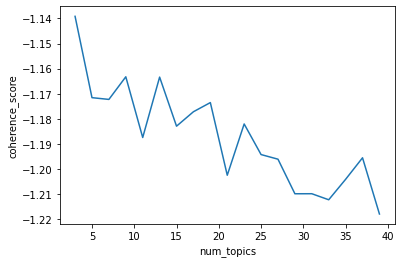

In [43]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)